In [1]:
N = (12 + 4 ) % 5 + 1
print(N)



2


Завдання 3: ['Id', 'Name', 'Year', 'Gender', 'Count'] 

Завдання 4:
                  Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04 

Завдання 5: Кількість унікальних імен: 93889 

Завдання 8: Найпопулярніше ім'я за результатами одного року:
 Id        431053
Name       Linda
Year        1947
Gender         F
Count      99680
Name: 431052, dtype: object 

Завдання 9: Кількість записів з мінімальним значенням Count: 254615 

Завдання 11: Рік із найбільшою кількістю унікальних імен: 2008 

Завдання 12: Найпопулярніше ім'я в році з найбільшою кількістю унікальних імен:
 Id        1608303
Name        Jacob
Year         2008
Gen

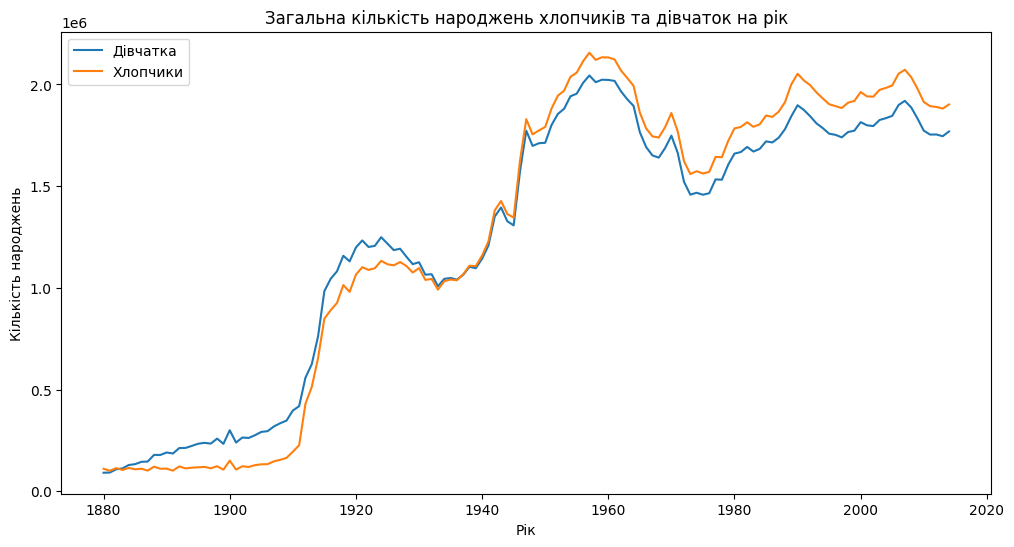

Завдання 20: Кількість гендерно нейтральних імен: 8914 

Завдання 22: Кількість років спостереження: 135 

Завдання 23: Найпопулярніші гендерно-нейтральні імена (які присутні кожного року): ['Francis', 'James', 'Jean', 'Jesse', 'Jessie', 'John', 'Johnnie', 'Joseph', 'Lee', 'Leslie', 'Marion', 'Ollie', 'Robert', 'Sidney', 'Tommie', 'William'] 

Завдання 24: Найпопулярніше серед непопулярних імен:
 [('James', 5129096), ('John', 5106590), ('Robert', 4816785), ('Michael', 4330805), ('Mary', 4130441), ('William', 4071368), ('David', 3590557), ('Joseph', 2580687), ('Richard', 2564867), ('Charles', 2376700)] 

Завдання 27: Найпопулярніші імена в кожному році:
          Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
...       ...       ...    ...
1657592  2010  Isabella  22883
1691633  2011    Sophia  21816
1725502  2012    Sophia  22267
1759186  2013    Sophia  211

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
filename = "C:/Users/panis/Downloads/archive/NationalNames.csv"
data = pd.read_csv(filename)

# Завдання 3: Отримати імена стовпців
def get_column_names(data):
    return data.columns.tolist()

# Завдання 4: Отримати загальну інформацію про дані у наборі
def get_data_description(data):
    return data.describe()

# Завдання 5: Знайти кількість унікальних імен
def count_unique_names(data):
    return data['Name'].nunique()

# Завдання 8: Знайти найпопулярніше ім'я за результатами одного року
def get_most_popular_name(data):
    return data.loc[data['Count'].idxmax()]

# Завдання 9: Підрахувати кількість записів з мінімальним значенням Count
def count_min_records(data):
    return data[data['Count'] == data['Count'].min()].shape[0]

# Завдання 11: Знайти рік із найбільшою кількістю унікальних імен
def get_year_with_most_unique_names(data):
    return data.groupby('Year')['Name'].nunique().idxmax()

# Завдання 12: Найпопулярніше ім'я в році з найбільшою кількістю унікальних імен
def get_popular_name_in_most_unique_year(data):
    year = get_year_with_most_unique_names(data)
    return data[data['Year'] == year].sort_values(by='Count', ascending=False).iloc[0]

# Завдання 13: Рік, коли ім'я "Jacob" було найпопулярнішим серед жіночих імен
def get_year_jacob_most_popular_female(data):
    jacob_data = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')]
    return jacob_data.sort_values(by='Count', ascending=False).iloc[0]['Year'] if not jacob_data.empty else None

# Завдання 14: Рік із найбільшою кількістю гендерно нейтральних імен
def get_year_with_most_neutral_names(data):
    neutral_names = data.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
    return neutral_names[neutral_names['Gender'] > 1].groupby('Year').size().idxmax()

# Завдання 16: Знайти рік, коли народилося найбільше дітей
def get_year_with_most_births(data):
    return data.groupby('Year')['Count'].sum().idxmax()

# Завдання 17: Кількість дівчаток та хлопчиків, які народились кожного року
def count_gender_per_year(data):
    return data.groupby(['Year', 'Gender'])['Count'].sum().unstack()

# Завдання 18: Підрахувати кількість років, коли дівчаток народжувалось більше, ніж хлопчиків
def count_years_more_females(data):
    gender_counts = count_gender_per_year(data)
    return (gender_counts['F'] > gender_counts['M']).sum()

# Завдання 19: Графік загальної кількості народжень хлопчиків та дівчаток на рік
def plot_births_by_gender(data):
    gender_counts = count_gender_per_year(data)
    plt.figure(figsize=(12, 6))
    plt.plot(gender_counts.index, gender_counts['F'], label='Дівчатка')
    plt.plot(gender_counts.index, gender_counts['M'], label='Хлопчики')
    plt.xlabel('Рік')
    plt.ylabel('Кількість народжень')
    plt.title('Загальна кількість народжень хлопчиків та дівчаток на рік')
    plt.legend()
    plt.show()

# Завдання 20: Кількість гендерно нейтральних імен
def count_neutral_names(data):
    neutral_names = data.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
    return neutral_names[neutral_names['Gender'] > 1]['Name'].nunique()

# Завдання 22: Підрахунок років спостереження
def count_observation_years(data):
    return data['Year'].nunique()

# Завдання 23: Найпопулярніші гендерно-нейтральні імена (які присутні кожного року)
def get_popular_neutral_names_each_year(data):
    years_count = count_observation_years(data)
    neutral_names = data.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
    neutral_names = neutral_names[neutral_names['Gender'] > 1]
    return neutral_names.groupby('Name').size()[lambda x: x == years_count].index.tolist()

# Завдання 24: Найпопулярніше серед непопулярних імен
def get_most_popular_of_least_popular_names(data):
    name_counts = data.groupby('Name')['Count'].sum()
    sorted_names = name_counts.sort_values(ascending=True)
    least_popular_10 = sorted_names.head(10)
    sorted_least_popular_top = least_popular_10.sort_values(ascending=False)   
    result = [(name, count) for name, count in sorted_least_popular_top.items()]
    return result

# Завдання 27: Найпопулярніші імена в кожному році
def get_most_popular_names_each_year(data):
    return data.loc[data.groupby('Year')['Count'].idxmax()][['Year', 'Name', 'Count']]

print("Завдання 3:", get_column_names(data), "\n")
print("Завдання 4:\n", get_data_description(data), "\n")
print("Завдання 5: Кількість унікальних імен:", count_unique_names(data), "\n")
print("Завдання 8: Найпопулярніше ім'я за результатами одного року:\n", get_most_popular_name(data), "\n")
print("Завдання 9: Кількість записів з мінімальним значенням Count:", count_min_records(data), "\n")
print("Завдання 11: Рік із найбільшою кількістю унікальних імен:", get_year_with_most_unique_names(data), "\n")
print("Завдання 12: Найпопулярніше ім'я в році з найбільшою кількістю унікальних імен:\n", get_popular_name_in_most_unique_year(data), "\n")
print("Завдання 13: Рік, коли 'Jacob' був найпопулярнішим серед жіночих імен:", get_year_jacob_most_popular_female(data), "\n")
print("Завдання 14: Рік із найбільшою кількістю гендерно нейтральних імен:", get_year_with_most_neutral_names(data), "\n")
print("Завдання 16: Рік з найбільшою кількістю народжень:", get_year_with_most_births(data), "\n")
print("Завдання 17: Кількість дівчаток та хлопчиків на кожен рік:\n", count_gender_per_year(data), "\n")
print("Завдання 18: Кількість років, коли дівчаток було більше ніж хлопчиків:", count_years_more_females(data), "\n")
print("Завдання 19: Графік загальної кількості народжень хлопчиків та дівчаток на рік")
plot_births_by_gender(data)
print("Завдання 20: Кількість гендерно нейтральних імен:", count_neutral_names(data), "\n")
print("Завдання 22: Кількість років спостереження:", count_observation_years(data), "\n")
print("Завдання 23: Найпопулярніші гендерно-нейтральні імена (які присутні кожного року):", get_popular_neutral_names_each_year(data), "\n")
print("Завдання 24: Найпопулярніше серед непопулярних імен:\n", get_most_popular_of_least_popular_names(data), "\n")
print("Завдання 27: Найпопулярніші імена в кожному році:\n", get_most_popular_names_each_year(data), "\n")
